In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt 


In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train[:5] #Since this is an 2d array what we need is just the values 6 or 9 which are actually index so we need to reshape this array or y_train

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
#Reshaping y_train
y_train = y_train.reshape(-1 , )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

In [12]:
def plot_sample(X , y , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

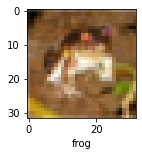

In [13]:
plot_sample(X_train , y_train , 0)

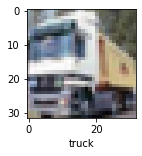

In [14]:
plot_sample(X_train , y_train , 1)

In [15]:
#Normalizing our data we need to divide each pixel value by 255 to make it in 0 to 1 range
X_train = X_train / 255 
X_test = X_test / 255 

In [19]:
#Building first a simple ANN 
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32 ,3)) , 
                         layers.Dense(3000 , activation = 'relu') , 
                          layers.Dense(1000 , activation = 'relu') , 
                         layers.Dense(10 , activation = 'sigmoid') , 
])

ann.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8120 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6237 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 123s 78ms/step - loss: 1.5413 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4828 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4321 - accuracy: 0.4952


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_report: \n' , classification_report(y_test , y_pred_classes))

Classification_report: 
               precision    recall  f1-score   support

           0       0.73      0.26      0.38      1000
           1       0.65      0.55      0.60      1000
           2       0.50      0.13      0.20      1000
           3       0.31      0.37      0.34      1000
           4       0.62      0.12      0.20      1000
           5       0.41      0.35      0.38      1000
           6       0.33      0.83      0.47      1000
           7       0.59      0.49      0.54      1000
           8       0.39      0.81      0.53      1000
           9       0.57      0.49      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.42     10000
weighted avg       0.51      0.44      0.42     10000



In [21]:
#Using CNN to improve the performance of the model
cnn = models.Sequential([
                         #cnn 
                         layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) , 

                         layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) , 
                         #dense
                         layers.Flatten() , 
                         layers.Dense(64 , activation = 'relu') , 
                         layers.Dense(10 , activation = 'softmax') ,
])

cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
cnn.fit(X_train , y_train , epochs = 10)



Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4506 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0887 - accuracy: 0.6200
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9612 - accuracy: 0.6666
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8742 - accuracy: 0.6959
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8102 - accuracy: 0.7188
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7586 - accuracy: 0.7358
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7099 - accuracy: 0.7517
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6658 - accuracy: 0.7691
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6239 - accuracy: 0.7824
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [23]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9530 - accuracy: 0.6981


[0.9529609084129333, 0.6980999708175659]

In [24]:
y_test = y_test.reshape(-1 , )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

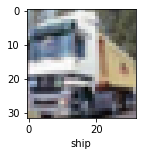

In [25]:
plot_sample(X_test , y_test , 1)

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.2787244e-05, 3.8954028e-07, 1.7837000e-03, 9.9000084e-01,
        2.7804237e-04, 2.5915138e-03, 2.9431963e-03, 9.3726376e-05,
        2.2648789e-03, 9.6960775e-07],
       [6.0364604e-04, 5.2805473e-03, 1.1497424e-06, 2.6059359e-07,
        1.9060514e-10, 8.0148688e-09, 1.5334385e-09, 1.7566689e-08,
        9.9410492e-01, 9.4709312e-06],
       [1.5178661e-01, 1.9734187e-01, 5.8181747e-03, 1.9058749e-02,
        1.7461433e-03, 1.0136805e-03, 1.9912221e-03, 1.7667381e-03,
        6.1496907e-01, 4.5077587e-03],
       [5.6799442e-01, 3.3557901e-01, 1.8372824e-02, 3.8298713e-03,
        5.3065429e-03, 1.2342412e-04, 7.4914042e-03, 1.7027867e-04,
        5.9076212e-02, 2.0560401e-03],
       [1.3097679e-07, 1.1275511e-08, 4.9532955e-03, 3.9918744e-04,
        1.7819181e-03, 5.2557261e-05, 9.9281222e-01, 1.3522570e-07,
        5.6683916e-07, 5.5774432e-08]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 6, 5, 7, 8, 6]

In [37]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [30]:
classes[y_classes[1]]

'ship'

In [32]:
print('Classification report: \n' , classification_report(y_test , y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.91      0.67      0.77      1000
           2       0.58      0.63      0.61      1000
           3       0.52      0.51      0.51      1000
           4       0.68      0.61      0.64      1000
           5       0.61      0.61      0.61      1000
           6       0.74      0.81      0.77      1000
           7       0.74      0.77      0.75      1000
           8       0.81      0.81      0.81      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

